# Ames Housing Dataset Exploration

## Introduction

This project uses the Ames housing data available on Kaggle (https://www.kaggle.com/datasets/prevek18/ames-housing-dataset) which includes 81 features describing a wide range of characteristics of 2,930 houses in Ames, Iowa sold between 2006 and 2010. The purpose of this notebook is to explore the dataset to give us a better understanding of the features, which is later used to predict the price of Ames Housing. 

### Importing Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import Dataset

In [2]:
df = pd.read_csv('AmesHousing.csv')

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Preliminary Data Exploration

In [4]:
df.shape

(2930, 82)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

This dataset has 2930 rows and 82 columns. These columns contain the characteristics of each house in Ames.  The description of the columns are as follows:

* Order: the index of each row (starting at 1)
* PID: ID of the house

**Related to location of the house:**
* MS Zoning: The general zoning classification
* Lot Frontage: Linear feet of street connected to house
* Lot Area: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* Lot Shape: General shape of house
* Land Contour: Flatness of the house
* Lot Config: Lot configuration
* Land Slope: Slope of house
* Neighborhood: Physical locations within Ames city limits
* Condition 1: Proximity to main road or railroad
* Condition 2: Proximity to main road or railroad (if a second is present)

**Building type and class:**
* MS SubClass: The building class. Data type is integer, however this is a categorical column 
* Bldg Type: Type of dwelling
* House Style: Style of dwelling
* Year Built: Original construction date
* Year Remod/Add: Remodel date

**Overall rating of the material and condition of the house:**
* Overall Qual: Rates the overall material and finish quality
* Overall Cond: Rates the overall condition rating
* Functional: Home functionality rating

**Utilities in the house:**
* Utilities: Type of utilities available
* Heating: Type of heating
* Heating QC: Heating quality and condition
* Central Air: Central air conditioning
* Electrical: Electrical system

**Material of the house:**
* Roof Style: Type of roof
* Roof Matl: Roof material
* Exterior 1st: Exterior covering on house
* Exterior 2nd: Exterior covering on house (if more than one material)
* Mas Vnr Type: Masonry veneer type
* Mas Vnr Area: Masonry veneer area in square feet
* Exter Qual: Exterior material quality
* Exter Cond: Present condition of the material on the exterior
* Foundation: Type of foundation

**The following columns describe the facilities of each apartment unit:**
* 1st Flr SF: First Floor square feet
* 2nd Flr SF: Second floor square feet
* Low Qual Fin SF: Low quality finished square feet (all floors)
* Gr Liv Area: Above grade (ground) living area square feet
* Full Bath: Full bathrooms above grade
* Half Bath: Half baths above grade
* Bedroom AbvGr: Number of bedrooms above basement level
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

**Related to kitchen:**
* Kitchen AbvGr: Kitchens above grade
* Kitchen Qual: Kitchen quality

**Related to fireplace:**
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality

**Related to basement:**
* Bsmt Qual: Height of the basement
* Bsmt Cond: General condition of the basement
* Bsmt Exposure: Walkout or garden level basement walls
* BsmtFin Type1: Quality of basement finished area
* BsmtFin SF1: Type 1 finished square feet
* BsmtFin Type2: Quality of second finished area (if present)
* BsmtFin SF2: Type 2 finished square feet
* BsmtUnf SF: Unfinished square feet of basement area
* Total Bsmt SF: Total square feet of basement area
* Bsmt Full Bath: Basement full bathrooms
* Bsmt Half Bath: Basement half bathrooms

**Related to garage:**
* Garage Type: Garage location
* Garage YrBlt: Year garage was built
* Garage Finish: Interior finish of the garage
* Garage Cars: Size of garage in car capacity
* Garage Area: Size of garage in square feet
* Garage Qual: Garage quality
* Garage Cond: Garage condition
* Paved Drive: Paved driveway

**Other outdoor area in the house (if available):**
* Wood Deck SF: Wood deck area in square feet
* Open Porch SF: Open porch area in square feet
* Enclosed Porch: Enclosed porch area in square feet
* 3Ssn Porch: Three season porch area in square feet
* Screen Porch: Screen porch area in square feet
* Pool Area: Pool area in square feet
* Pool QC: Pool quality

**Others:**
* Fence: Fence quality
* Misc Feature: Miscellaneous feature not covered in other categories
* Misc Val: Value of miscellaneous feature

**Sell related columns:**
* Mo Sold: Month Sold
* Yr Sold: Year Sold
* Sale Type: Type of sale
* Sale Condition: Condition of sale
* SalePrice: the house's sale price in dollars. 

1. For making further coding easier, I will remove the space in column names.
2. Remove `Order` and `PID`because it is a unique column that we don't need.
3. Change the MS SubClass to object for EDA purpose.
3. There are many columns that has missing value, need further observation.

In [6]:
df_update = df.copy()
df_update.columns = df_update.columns.str.replace(' ', '')
df_update['MSSubClass'] = df_update['MSSubClass'].astype(object)
df_update.drop(['Order', 'PID'], axis = 'columns', inplace = True)

### Missing Values and Duplicates

Since this dataset has many columns with missing value, I will focus on identifying only the column with missing value. I count the percentage of missing value in the column to better decide what to do to them.

In [7]:
df_na = (df_update.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
df_na

PoolQC          99.556314
MiscFeature     96.382253
Alley           93.242321
Fence           80.477816
FireplaceQu     48.532423
LotFrontage     16.723549
GarageCond       5.426621
GarageQual       5.426621
GarageFinish     5.426621
GarageYrBlt      5.426621
GarageType       5.358362
BsmtExposure     2.832765
BsmtFinType2     2.764505
BsmtFinType1     2.730375
BsmtQual         2.730375
BsmtCond         2.730375
MasVnrArea       0.784983
MasVnrType       0.784983
BsmtHalfBath     0.068259
BsmtFullBath     0.068259
TotalBsmtSF      0.034130
BsmtUnfSF        0.034130
GarageCars       0.034130
GarageArea       0.034130
BsmtFinSF2       0.034130
BsmtFinSF1       0.034130
Electrical       0.034130
dtype: float64

1. After observing, it turns out that there are more than 40% of missing value  in `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu` colums. Based on other columns related, we can understand that this columns has null value because most of the house do not have pool, extra feature, alley, fence and fireplace. Therefore, I will change it to 'None' for now.

2. We can observe that `LotFrontage` has around 17% missing value. Since the LotFrontage is Linear feet of street connected to house, I think it will be related to the area. I will fill with missing value in LotFrontage with median.

3. For other columns with less than 10% of missing value, I will just simply delete the rows.

In [8]:
missval_cat = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', ]
for col in missval_cat:
    df_update[col] = df_update[col].fillna('None').reset_index(drop = True)

In [9]:
df_update['LotFrontage'] = df_update['LotFrontage'].fillna(df_update['LotFrontage'].median())

In [10]:
missing_less10_cols = ['GarageCars', 'GarageArea', 'GarageYrBlt', 'GarageCond', 'GarageQual','GarageFinish','GarageType',
                       'BsmtFinSF2', 'BsmtFinSF1', 'BsmtExposure','BsmtFinType2','BsmtFinType1',
                       'BsmtQual', 'BsmtCond', 'BsmtFullBath','BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF',
                       'MasVnrArea', 'MasVnrType', 'Electrical']
for col in missing_less10_cols:
    df_update = df_update[df_update[col].notna()].reset_index(drop = True)

In [11]:
df_update.isnull().values.any()

False

In [12]:
df_update.duplicated().values.any()

False

Now we can confirm that there is no duplicates or missing values in the dataset.

## Exploratory Data Analysis

### Statistical Summary and Univariate Analysis

In this step, we are going to do some data exploration to gain more insights on our dataset. For explore the statistical summary easier, we can divide the column into two categories: numerical value and categorical value.

In [13]:
num = df_update.select_dtypes(exclude=object).columns
cat = df_update.select_dtypes(include=object).columns

#### Numerical value

In [14]:
df_update[num].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2678.0,69.346901,21.251265,21.0,60.00,68.0,79.00,313.0
LotArea,2678.0,10246.545183,8075.049290,1300.0,7508.00,9555.0,11645.00,215245.0
OverallQual,2678.0,6.213592,1.353177,2.0,5.00,6.0,7.00,10.0
OverallCond,2678.0,5.587005,1.069010,1.0,5.00,5.0,6.00,9.0
YearBuilt,2678.0,1973.020911,29.535837,1879.0,1955.00,1976.0,2001.00,2010.0
YearRemod/Add,2678.0,1985.025765,20.489775,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,2678.0,108.787901,183.865051,0.0,0.00,0.0,176.00,1600.0
BsmtFinSF1,2678.0,466.662061,457.412370,0.0,0.00,405.0,758.75,5644.0
BsmtFinSF2,2678.0,53.461165,175.366767,0.0,0.00,0.0,0.00,1526.0
BsmtUnfSF,2678.0,570.835698,435.852712,0.0,237.25,474.0,808.00,2336.0


**Observation:**

* Overall, the minimum and maximum values make sense for each column
* If we check the mean and median, other than `LotFrontage`, `OverallQual`, `OverallCond`, `YearBuilt`, `YearRemod/Add`, `GrLivArea`, `GarageArea` columns show somehow skewed distribution.

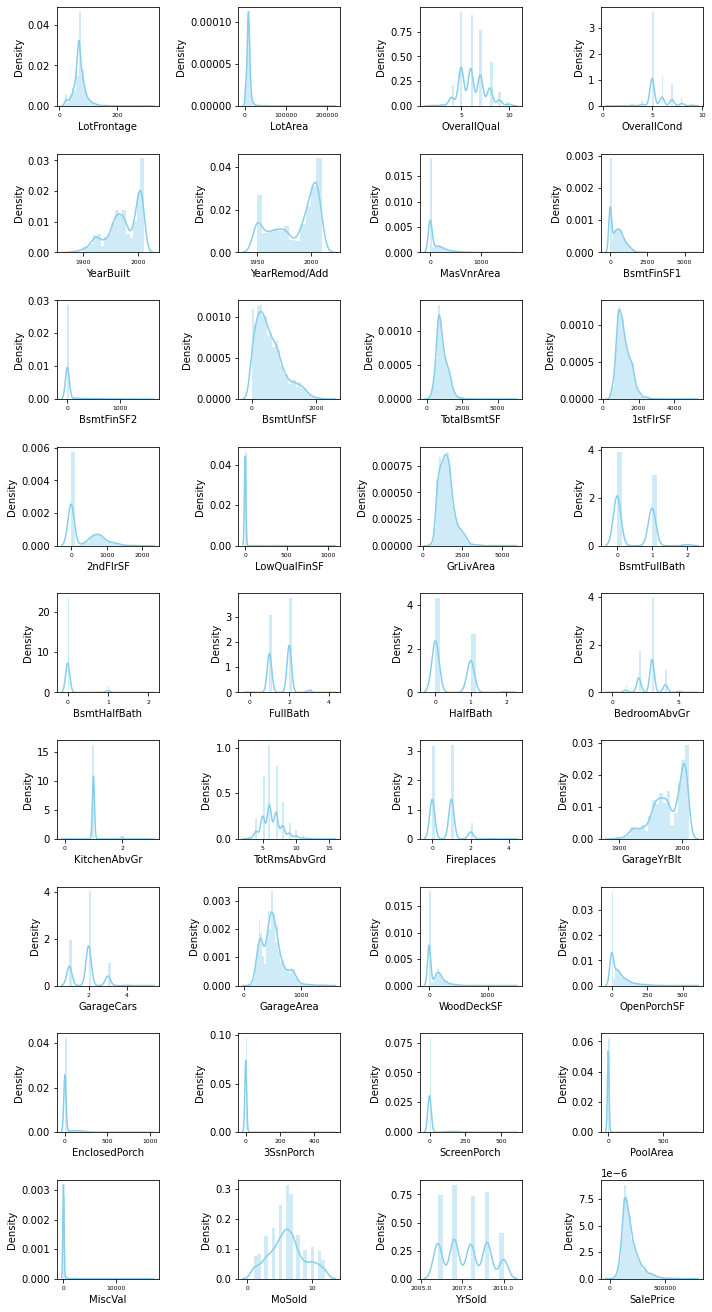

In [15]:
plt.figure(figsize=(10,20))
features = num
for i in range(0, len(features)):
    plt.subplot(10, 4, i+1)
    sns.distplot(x=df_update[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.xticks(size=6)
    plt.tight_layout()

Observation:
* We can ignore interpreting the symmetricity of columns related to score, number of basement or number of bedrooms. Because these columns has limited discrete values.
* The true continuous numeric features are related to the area: `LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscValue, SalePrice` are not symmetric.

#### Categorical columns

In [16]:
df_update[cat].describe().T

,count,unique,top,freq
MSSubClass,2678,16,20,1008
MSZoning,2678,6,RL,2112
Street,2678,2,Pave,2669
Alley,2678,3,None,2504
LotShape,2678,4,Reg,1657
LandContour,2678,4,Lvl,2409
Utilities,2678,3,AllPub,2676
LotConfig,2678,5,Inside,1946
LandSlope,2678,3,Gtl,2544
Neighborhood,2678,28,NAmes,416


**Observation:**
* Most of the house has normal quality, as we can see on `LotShape, Condition1, Condition2, ExterQual, ExterCond, BsmtQual, BsmtCond, KitchenQual, Functional, GarageQual, GarageCond, SaleCondition` columns.
* As there are many houses that have no pool, fence, and misc feature, `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu` shows 'None' value.
* Most of the house is in NAmes which is a Low Residential area
* Most of the house is 1 story building for 1 Family. 
* There are many columns that has imbalance data distribution, such as `Street, Alley, LandContour, Utilities, LandSlope, Condition1, Condition2, RoofMatl, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, PavedDrive, PoolQC, MiscFeature`.

### Bivariate Analysis

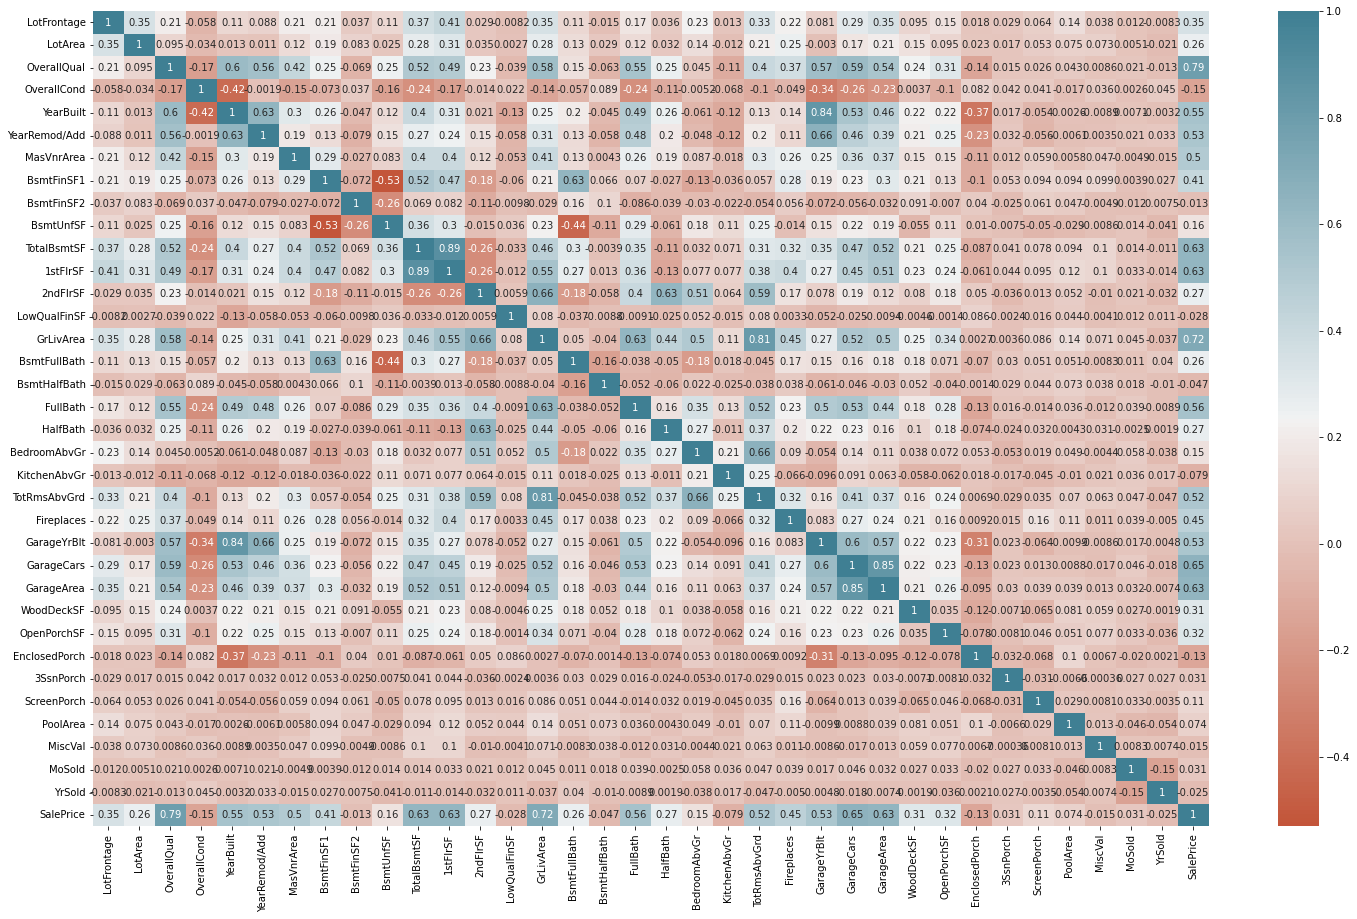

In [17]:
plt.figure(figsize=(25,15))
sns.heatmap(df_update.corr(),cmap=sns.diverging_palette(20, 220, n=200), annot=True)
plt.show()

Based on the correlation map above, we understand that:
1. There are several columns that has high correlation with SalePrice. They are `OverallQual`, `TotalBsmtSF`, `1stFlrSF`,`GarageCars` `GarageArea`, and `GrLvArea`.
2. There is high correlation of `GarageCars`and `GarageArea`. It makes sense because the bigger the garage area, the more cars can fit in.
3. There also high correlation of `TotalBsmtSF` and `1stFlrSF`. We can drop one of them later.

Now that we know general information of our dataset and which features correlates most with our target variable, we can investigate them more in depth. For making this easier, i will divide our columns into several topics.
The groups are:
* location related (loc_related)
* house Type (prop_cats)
* Rating of the house (rating)
* Utility in the house (utilities)
* Material used in the house (material)
* Standard rooms in a house (std_room)
* Extra rooms in a house (extra_room)
* Related to sale (sale)

#### Location Related

When we talk about house, of course the thing that is most often involved is location. For that I look further into matters relating to the location of this house.

In [18]:
loc_related_cat = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                   'Condition1', 'Condition2']
loc_related_num = ['LotFrontage', 'LotArea']

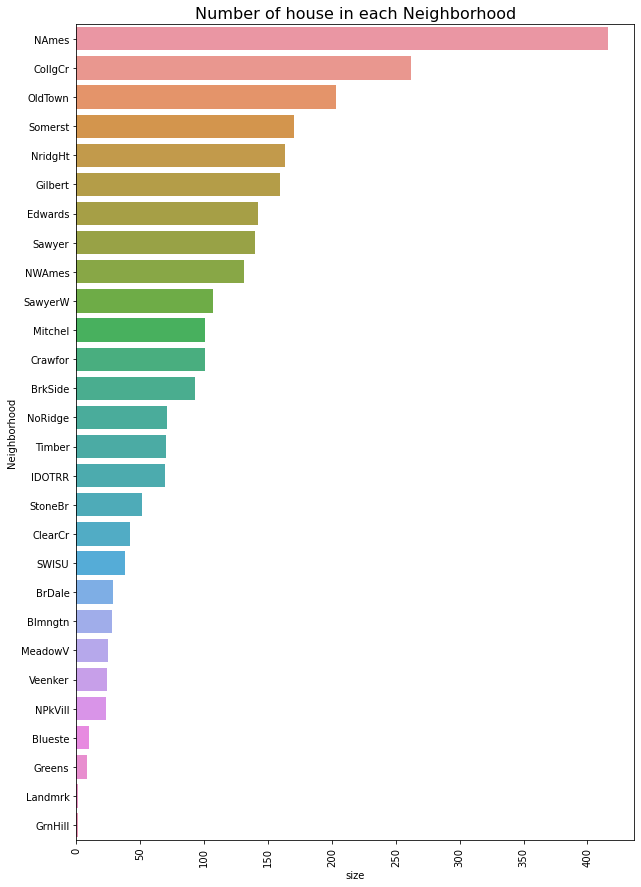

In [19]:
plt.figure(figsize=(10,15))
neighborhood = df_update.groupby(['Neighborhood'],as_index=False).size()
neighborhood = neighborhood.sort_values(['size'],ascending=False) 
sns.barplot(y=neighborhood['Neighborhood'], x=neighborhood['size'])
plt.xticks(rotation = 90)
plt.title("Number of house in each Neighborhood", fontsize=16)
plt.show()

The most houses were in the NAmes neighborhood, and the least in GrnHll.

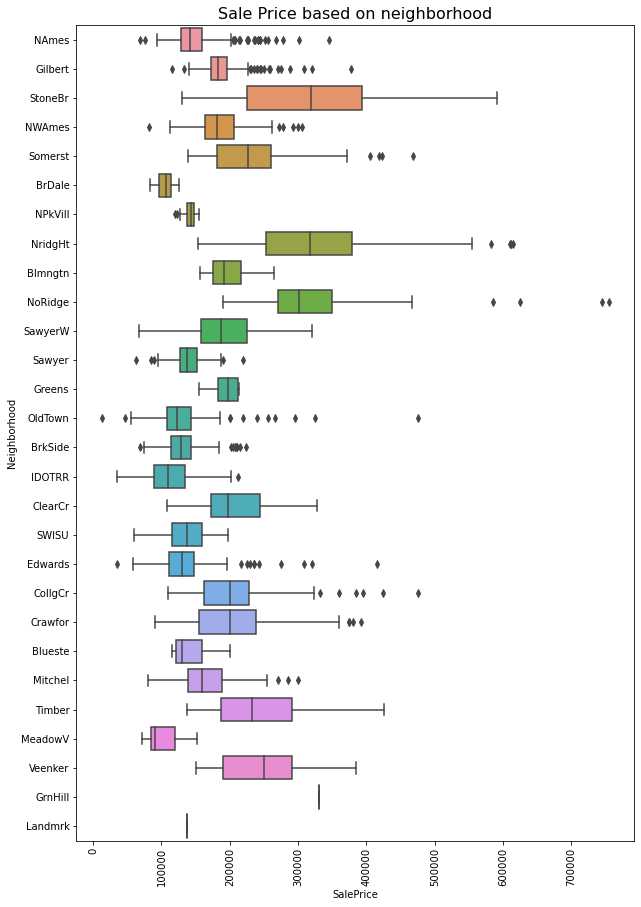

In [20]:
plt.figure(figsize=(10,15)) 
sns.boxplot(y = 'Neighborhood', x = 'SalePrice', data = df_update)
plt.xticks(rotation = 90)
plt.title("Sale Price based on neighborhood", fontsize=16)
plt.show()

When we compare the price based on neighborhood, we can understand that in the areas that have a lot of housing, like NAmes and Gilbert, the house prices tend to be cheaper and the price range is very small. This is also confirmed if we look at house prices in BrDale and NPkVill. While in StoneBr and NridgHt, there are quite a lot of houses with varying price ranges. This causes houses in this area to be included in the class of more expensive houses.

Now, I want to look deeper to other categorical features related to location:

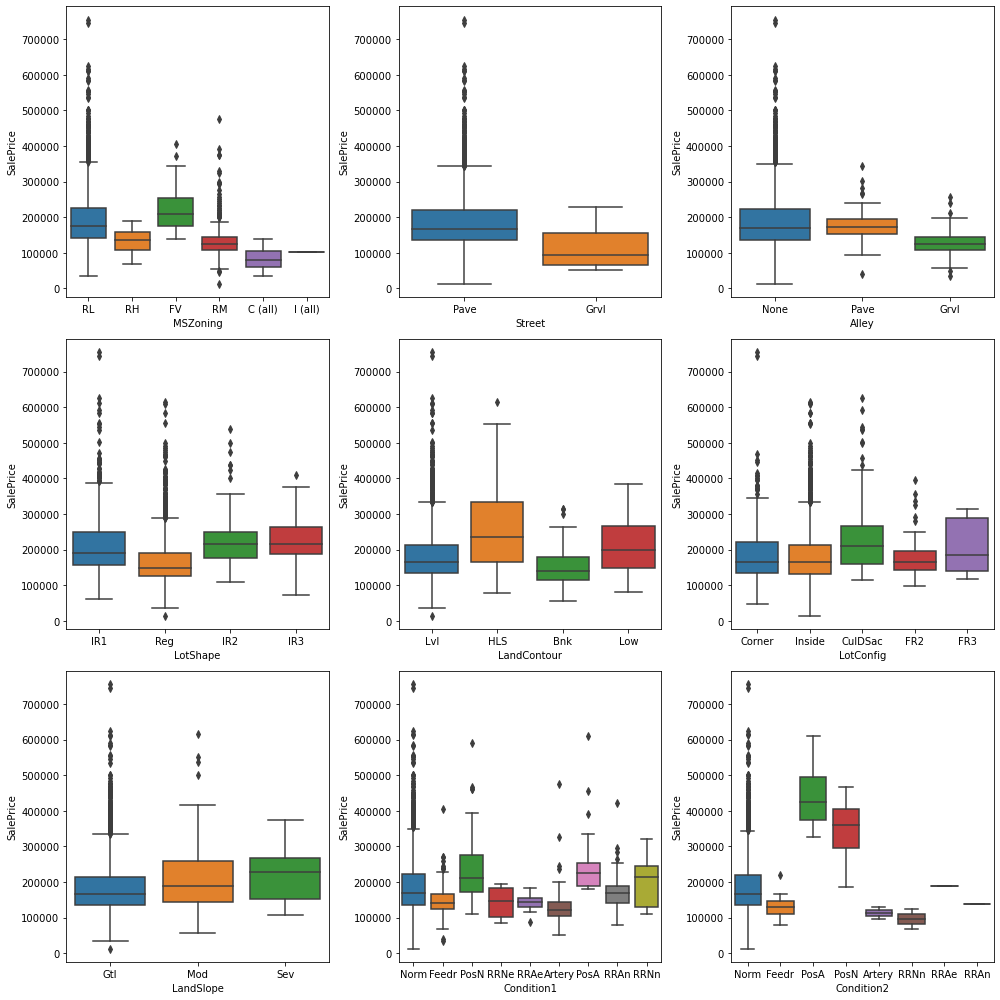

In [21]:
loc_related_cat.remove('Neighborhood')
plt.figure(figsize=(14,14))
for i in range(0, len(loc_related_cat)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = loc_related_cat[i], y = 'SalePrice', data = df_update)
    plt.tight_layout()

1. If we look at the figures above, we can see that the ones with the highest prices are the houses located in the Floating Village Residential, with the street material Pavement and not located in an alley.
2. The more expensive lot shapes are the irregular ones, with Hillside and Severe Slope Lot contours.The more expensive config is Frontage on 3 sides of house, which makes a lot of sense. Houses adjacent to or near to postive off-site features also considered to have higher price.  In my opinion, this is because usually houses in hillside areas are usually the type of good quality houses such as villas and located near positive off-site. To further confirm our assumptions, we can then compare the lot area and with LandContour, LandSlope, Condition1, Condition2. 

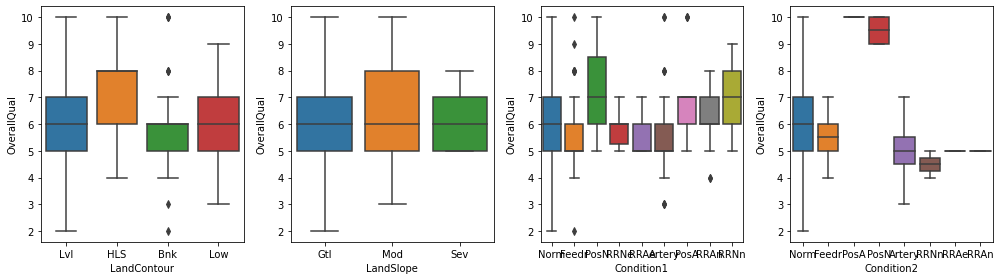

In [22]:
loc_check = ['LandContour', 'LandSlope', 'Condition1','Condition2']
plt.figure(figsize=(14,4))
for i in range(0, len(loc_check)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x = loc_check[i], y = 'OverallQual', data = df_update)
    plt.tight_layout()

We can confirm that being located in hillside, and adjacent or near the positive off-site, really increase our house quality. However, it is worth to mention that this is not related to LandSlope.

#### house Type

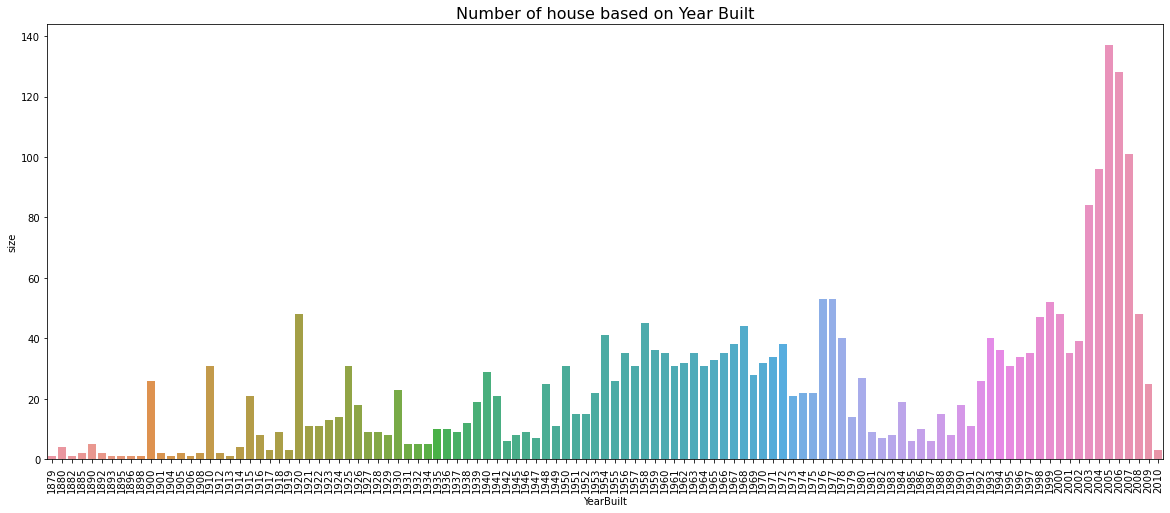

In [23]:
prop_type = ['MSSubClass', 'BldgType',  'HouseStyle', 'RoofStyle', 'YearBuilt', 'YearRemod/Add']

plt.figure(figsize=(20,8))
bldg_type = df_update.groupby(['YearBuilt'],as_index=False).size()
bldg_type = bldg_type.sort_values(['size'],ascending=False) 
sns.barplot(x=bldg_type['YearBuilt'], y=bldg_type['size'])
plt.xticks(rotation = 90)
plt.title("Number of house based on Year Built", fontsize=16)
plt.show()

Text(0.5, 1.0, 'Number of house based on Year Built')

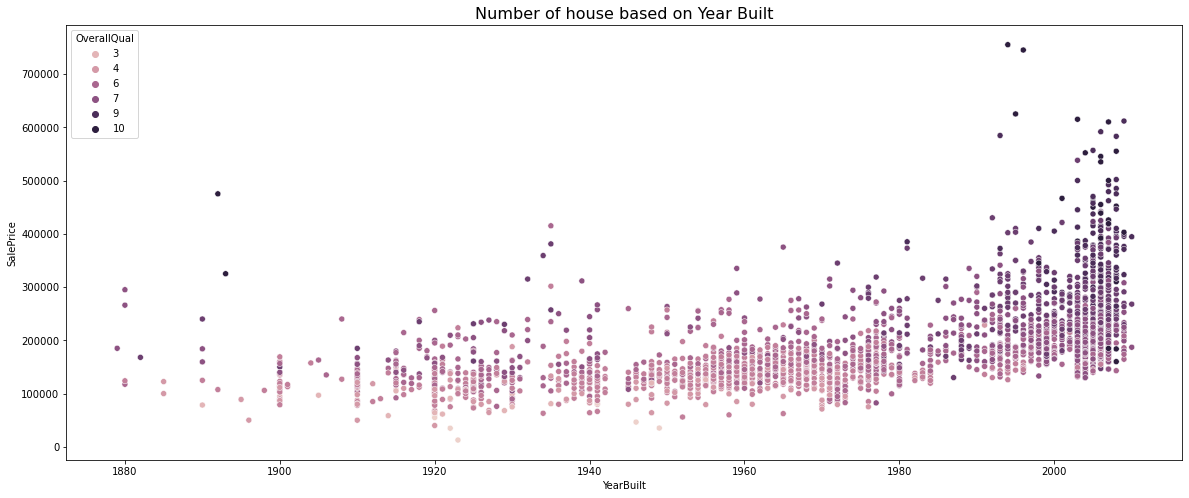

In [24]:
plt.figure(figsize=(20,8))
sns.scatterplot(data  = df_update, x='YearBuilt', y='SalePrice', hue='OverallQual')
plt.title("Number of house based on Year Built", fontsize=16)

It's not just the number of houses that grows over time. The price of each house is also influenced by the year the house was built. We can also understand from this figure that most of house built around 2010 has higher Overall Value.

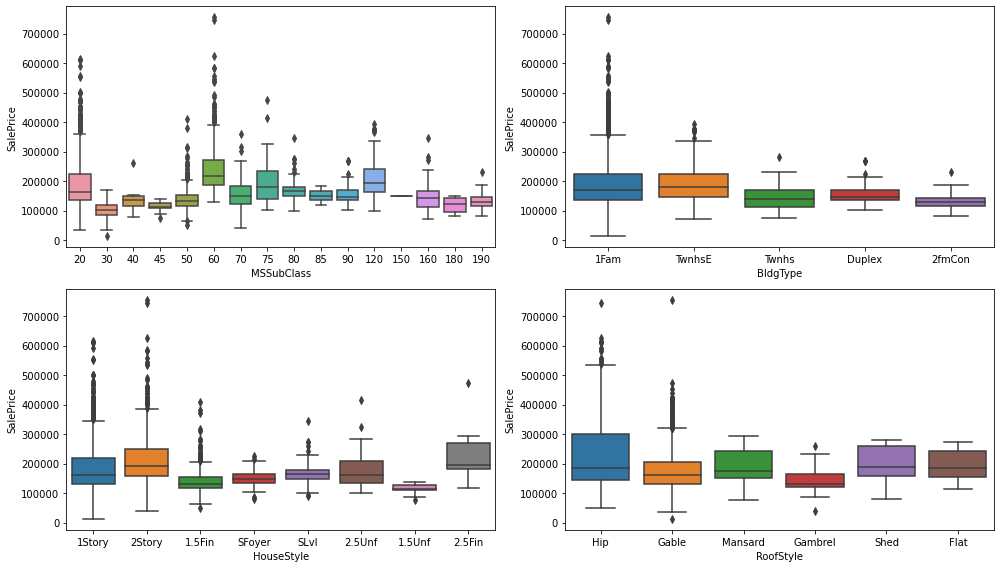

In [25]:
prop_type.remove('YearBuilt')
prop_type.remove('YearRemod/Add')
plt.figure(figsize=(14,8))
for i in range(0, len(prop_type)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = prop_type[i], y = 'SalePrice', data = df_update)
    plt.tight_layout()

Based on the type of house, the most expensive house is the 1Fam and the cheapest house is the 2fmCon and Twins.  The house with higher price is belong to 2-STORY 1946 & NEWER, which means it is the bigger house and newer and it makes a lot of sense.

<AxesSubplot:xlabel='MSSubClass', ylabel='OverallQual'>

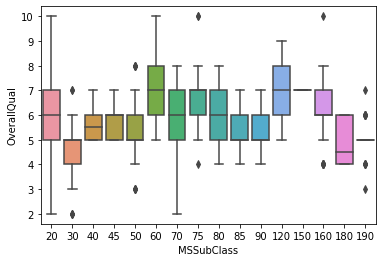

In [26]:
sns.boxplot(x = 'MSSubClass', y = 'OverallQual', data = df_update)

This figure also confirm that newer house (60 and 120) has better quality.

#### Rating

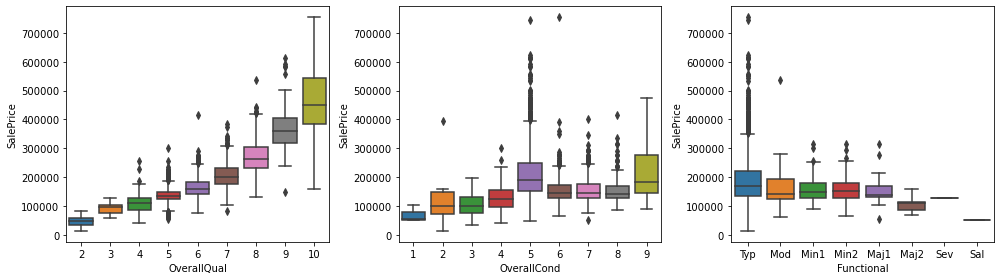

In [27]:
rating = ['OverallQual', 'OverallCond', 'Functional']

plt.figure(figsize=(14,4))
for i in range(0, len(rating)):
    plt.subplot(1, len(rating), i+1)
    sns.boxplot(x = rating[i], y = 'SalePrice', data = df_update)
    plt.tight_layout()

We can notice that the higher the OverallQual value, the higher the price. However, this does not apply to OverallCond. It can be seen that there are many houses with an OverallCond value of 5 at a higher price than the OverallCond 6-9. Probably, this is because of many outliers in OverallCondition. For Functional values, the highest is Typical and the lowest is Salvage Only. Interestingly, the price for seriously damaged house is higher than Major Deductions 2.

#### Utility

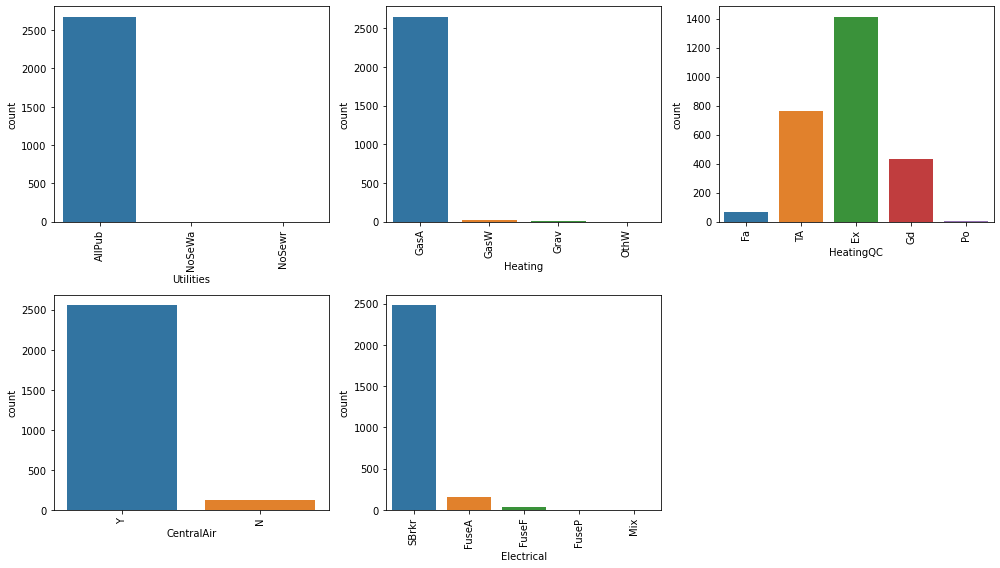

In [28]:
utilities = ['Utilities', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']

plt.figure(figsize=(14,8))
for i in range(0, len(utilities)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data = df_update, x=utilities[i])
    plt.xticks(rotation = 90)
    plt.tight_layout()

Most of the data has all public utilities, Gas forced warm air furnace in Heating, Central Air Conditioning and Standard Circuit Breakers & Romex in Electrical.

#### Material

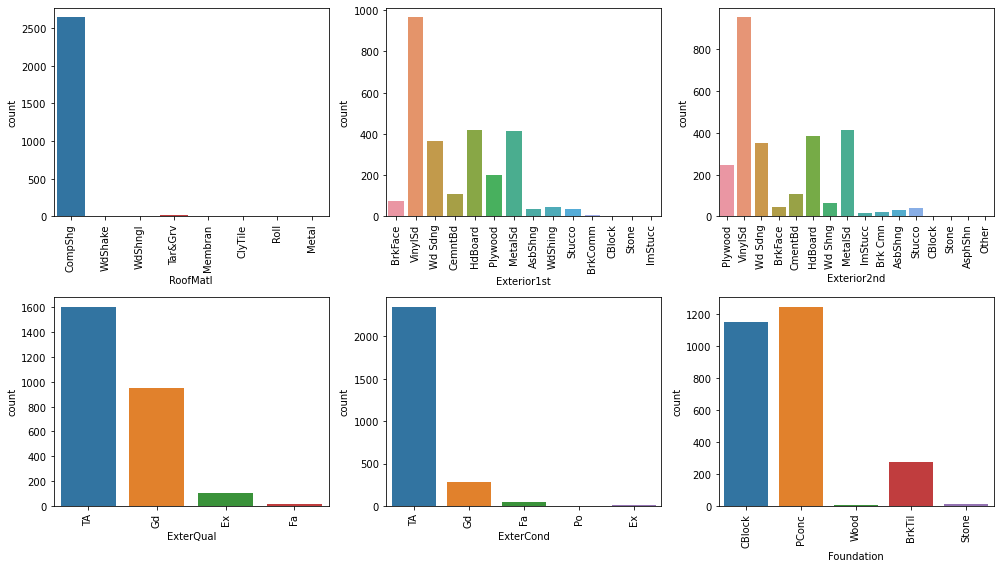

In [29]:
material = ['RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation']

plt.figure(figsize=(14,8))
for i in range(0, len(material)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data = df_update, x=material[i])
    plt.xticks(rotation = 90)
    plt.tight_layout()

All roof material is using Standard Composite Shingle. Most material used is Vinyl Siding   with typical quality and condition. There are two common foundation used, which are Cinder Block Poured Contrete.	

#### Standard Room in a house

Based on our correlation earlier, we understand that `GrLivArea` and `1stFlrSF` has high correlation with SalePrice. So we can check on the scatterplot to find the outliers.

##### GrLivArea

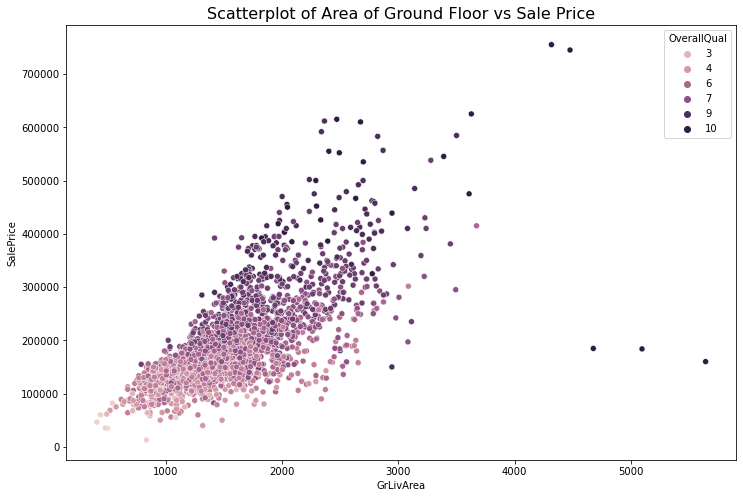

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_update['GrLivArea'],
                y=df_update['SalePrice'],
               hue=df_update['OverallQual'])
plt.title("Scatterplot of Area of Ground Floor vs Sale Price", fontsize=16)
plt.show()

From the scatterplot above, we can confirm that the area of the Ground Floor has an effect on SalePrice. However, there are 2 outliers (because they have the best value and large area but are cheap). This is also strengthen by the fact that this outlier has high Overall Qual value but the price is cheap. I am convinced that the data is outliers and I will omit it. 

In [31]:
df_update = df_update.drop(df_update[(df_update['GrLivArea'] > 4000) & (df_update['SalePrice'] < 300000)].index)

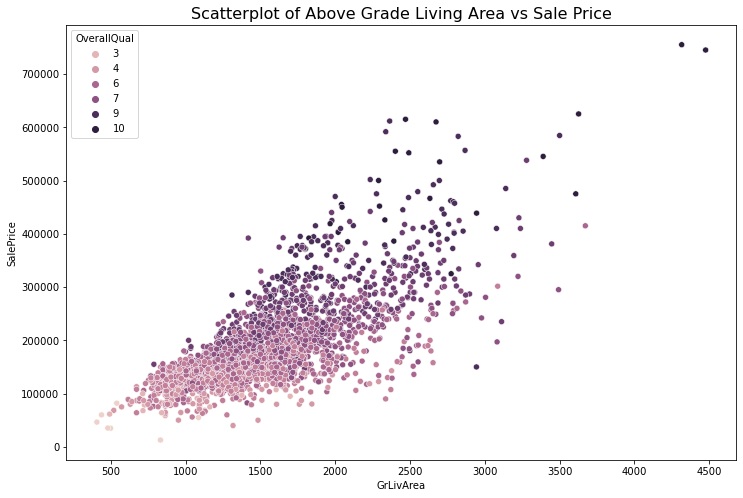

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_update['GrLivArea'],
                y=df_update['SalePrice'],
               hue=df_update['OverallQual'])
plt.title("Scatterplot of Above Grade Living Area vs Sale Price", fontsize=16)
plt.show()

##### 1stFlrSF

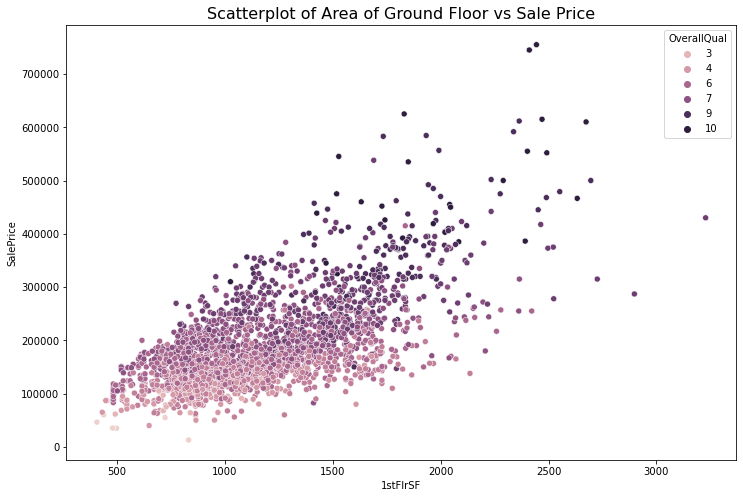

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_update['1stFlrSF'],
                y=df_update['SalePrice'],
               hue=df_update['OverallQual'])
plt.title("Scatterplot of Area of Ground Floor vs Sale Price", fontsize=16)
plt.show()

We can not find any significant outliers, so no need to delete anything.

##### 2ndFlrSF

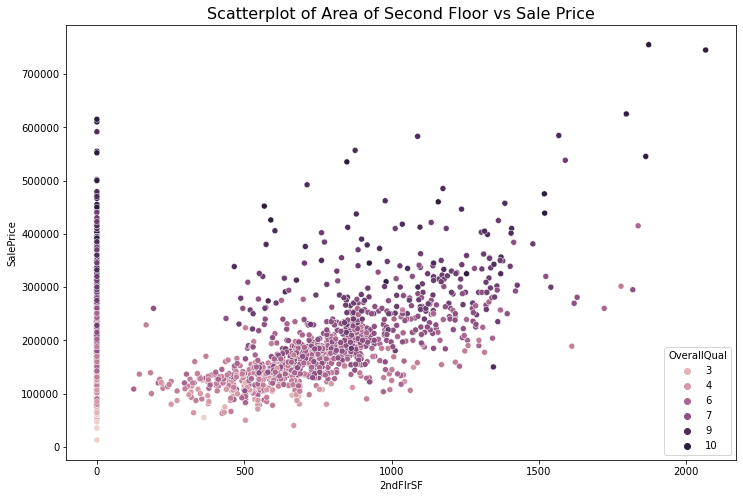

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_update['2ndFlrSF'],
                y=df_update['SalePrice'],
               hue=df_update['OverallQual'])
plt.title("Scatterplot of Area of Second Floor vs Sale Price", fontsize=16)
plt.show()

Actually, we can see the correlation between 2ndFlr with SalePrice. However, there are many house that have no 2nd floor but still has higher price and make the overall correlation ruined.

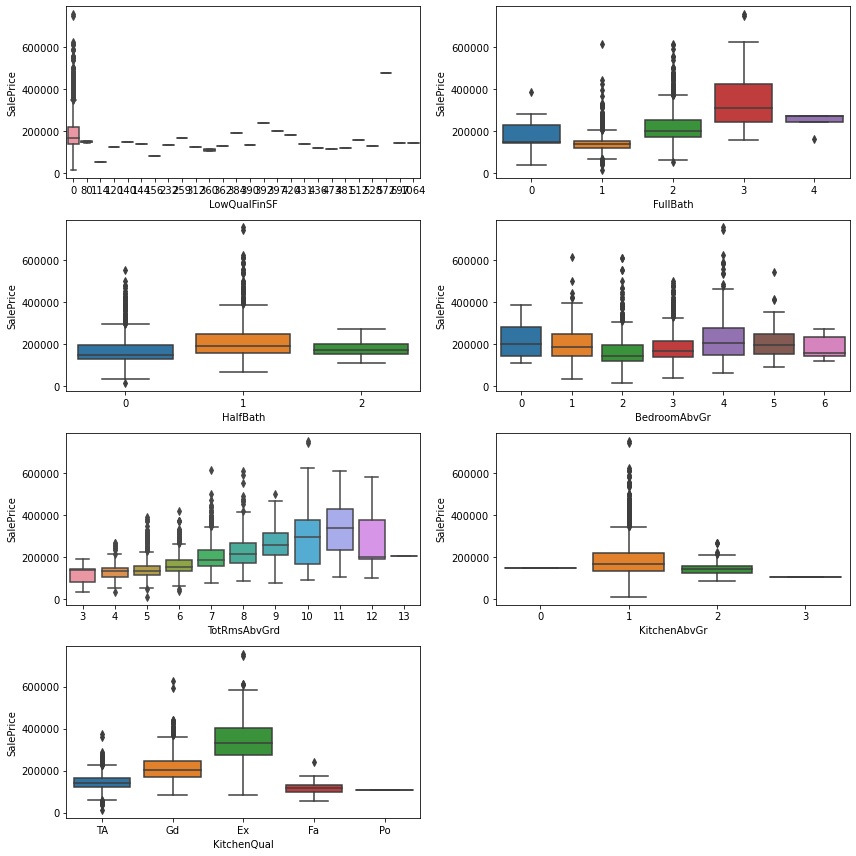

In [35]:
std_room = ['LowQualFinSF', 'FullBath','HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'KitchenAbvGr','KitchenQual']

plt.figure(figsize=(12,12))
for i in range(len(std_room)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = std_room[i],
                y = 'SalePrice',
                data = df_update)
    plt.tight_layout()

The more bathrooms, the more higher the price. However, when the number of bathrooms is more than 4, the price goes down. The same pattern can be observed with rooms number, the number of rooms over 11 is lower than the number of rooms 9-10, but from 3-11 shows good correlation. The other pattern that I notice is the better the kitchen, the more expensive the price. This means that quality matters more here.

#### Non standard room in a house

Based on our correlation earlier, we understand that `TotalBsmtSF`, `GarageCars`and `GarageArea`has high correlation with SalePrice. So we can check on the scatterplot to find the outliers.

##### Basement 

A basement or cellar is one or more floors of a building that are completely or partly below the ground floor. It generally is used as a utility space for a building, where such items as the furnace, water heater, breaker panel or fuse box, car park, and air-conditioning system are located.

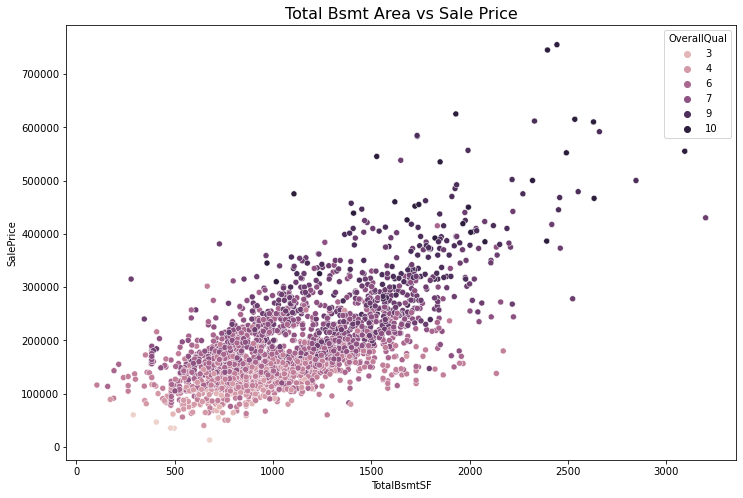

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_update['TotalBsmtSF'], 
                y=df_update['SalePrice'],
                hue=df_update['OverallQual'])
plt.title("Total Bsmt Area vs Sale Price", fontsize=16)
plt.show()

We can see that the total basement also affects the Sale Price, but it is the OverallQual value that has the most influence. We can see this from the number of houses with high prices even though the basement area is not the largest.

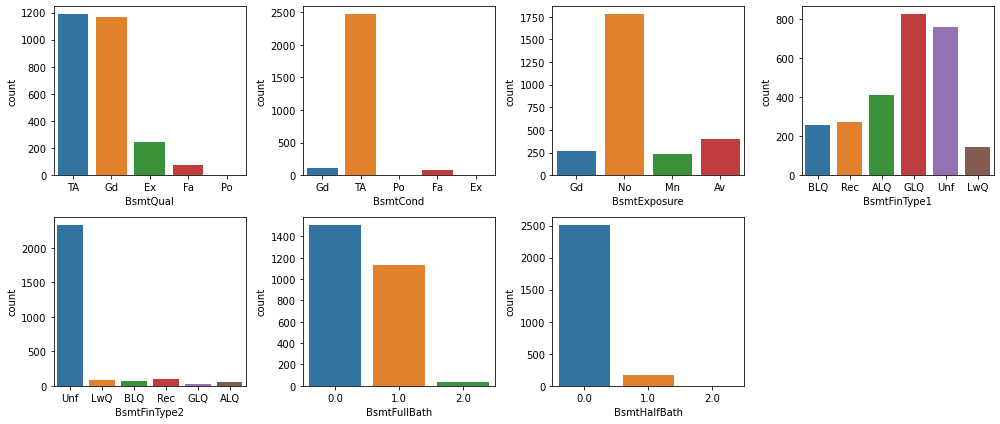

In [37]:
basement_cat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                'BsmtFullBath', 'BsmtHalfBath']

plt.figure(figsize=(14,6))
for i in range(0, len(basement_cat)):
    plt.subplot(2, 4, i+1)
    sns.countplot(data = df_update, x=basement_cat[i])
    plt.tight_layout()

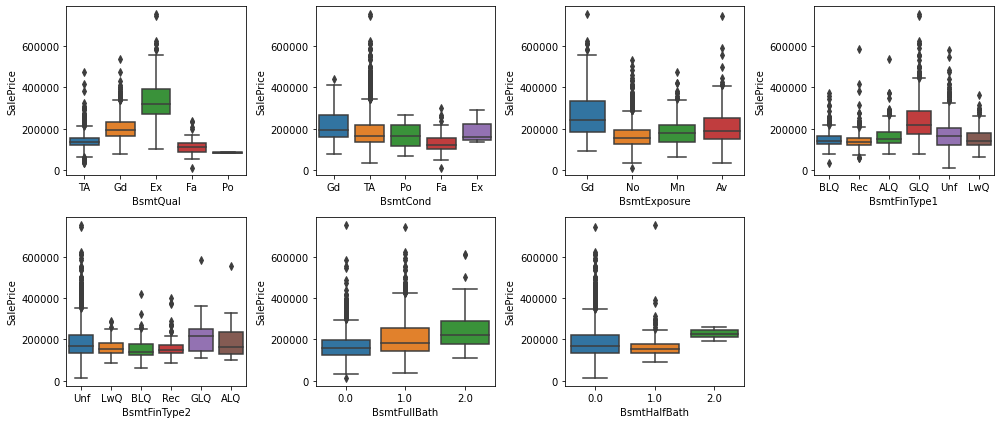

In [38]:
plt.figure(figsize=(14,6))
for i in range(0, len(basement_cat)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data = df_update, x=basement_cat[i], y = 'SalePrice')
    plt.tight_layout()

There are lots of unfinished basements. But the most influential on the price is the quality of the basement itself.

##### Garage

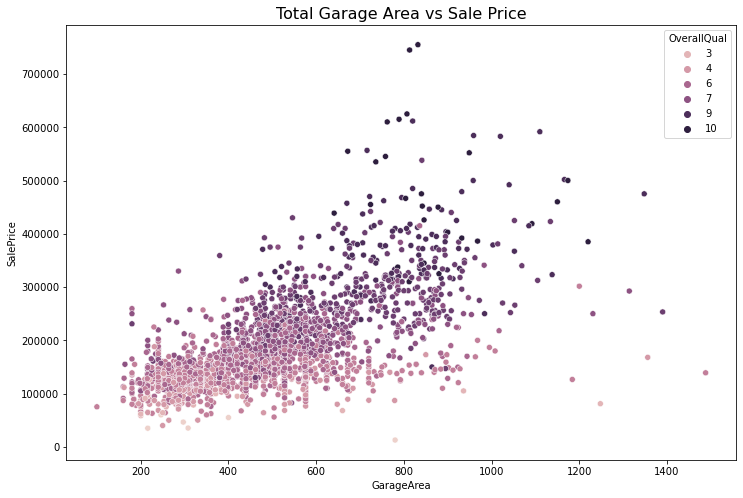

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_update['GarageArea'],
                y=df_update['SalePrice'],
               hue=df_update['OverallQual'])
plt.title("Total Garage Area vs Sale Price", fontsize=16)
plt.show()

We can see that the total area of the garage also affects the Sale Price, but it is the OverallQual value that is the most influential. We can see this from the number of houses with large garage areas that have low overallqual. This then results in lower house prices.

As we know before, that there are many garages that has no information of built year. Therefore I did not explore this column further.

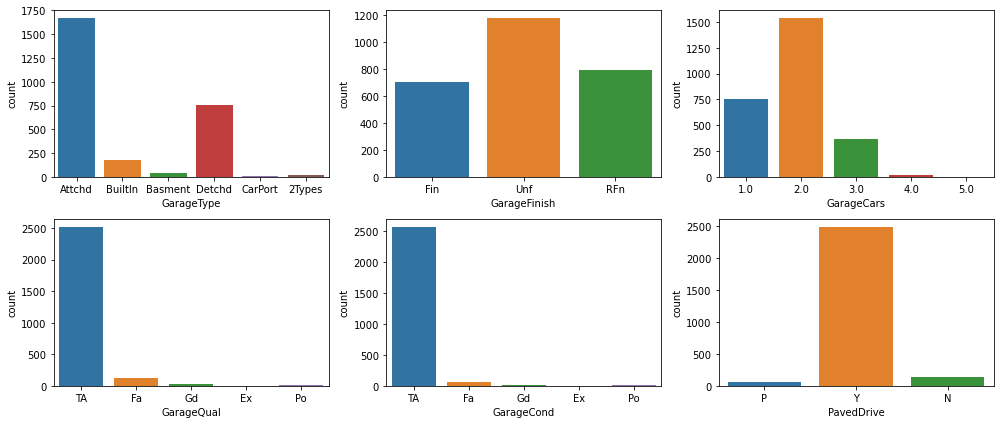

In [40]:
garage = ['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive']

plt.figure(figsize=(14,6))
for i in range(0, len(garage)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data = df_update, x=garage[i])
    plt.tight_layout()

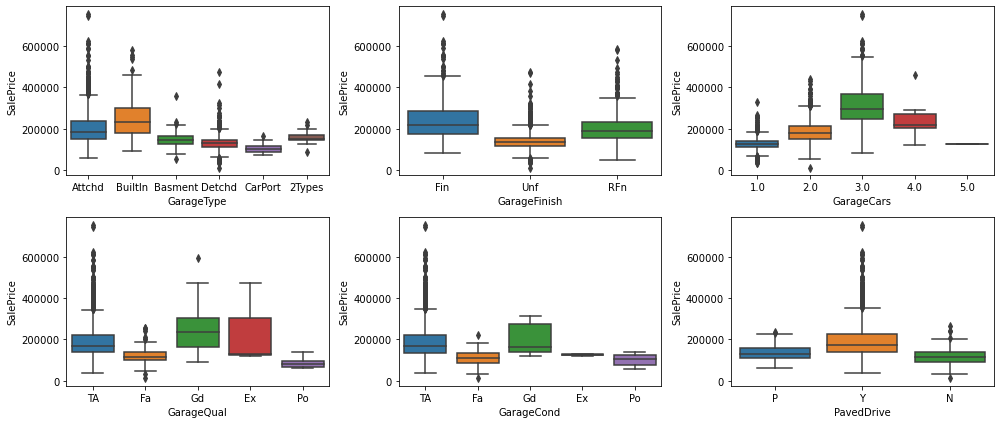

In [41]:
plt.figure(figsize=(14,6))
for i in range(0, len(garage)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data = df_update, x=garage[i], y = 'SalePrice')
    plt.tight_layout()

As we can see, garage tends to have a typical attached type and condition. It is difficult to draw conclusions whether this has an effect on prices or not because of the data imbalance.

##### Masonry veneer

Masonry veneer is a construction material used on the exterior walls of homes and commercial buildings. The masonry veneer is attached to the building's structure, but is self-supporting, and places no additional loads on the building's structural components.

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

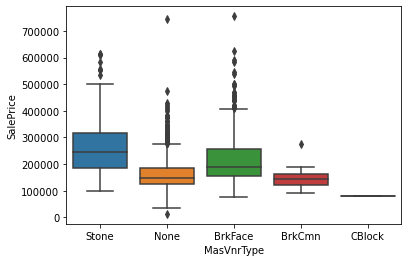

In [42]:
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df_update)

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

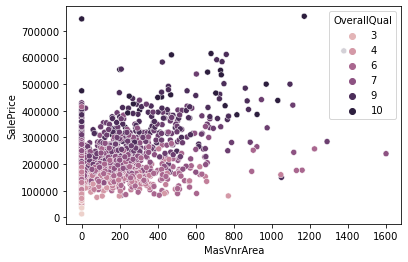

In [43]:
sns.scatterplot(data = df_update,
                x='MasVnrArea',
                y='SalePrice',
               hue=df_update['OverallQual'])

There is a slight correlation between the area of MasVnrArea and SalesPrice, and there is also a tendency for MasVnr with Stone material to have higher price.

##### Fireplaces

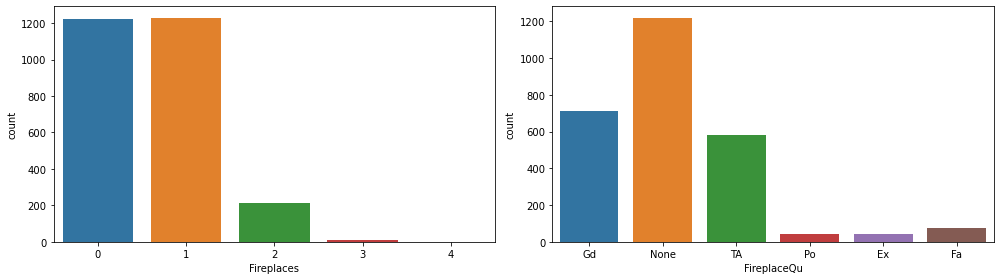

In [44]:
fireplace = ['Fireplaces', 'FireplaceQu']

plt.figure(figsize=(14,4))
for i in range(0, len(fireplace)):
    plt.subplot(1, 2, i+1)
    sns.countplot(data = df_update, x=fireplace[i])
    plt.tight_layout()

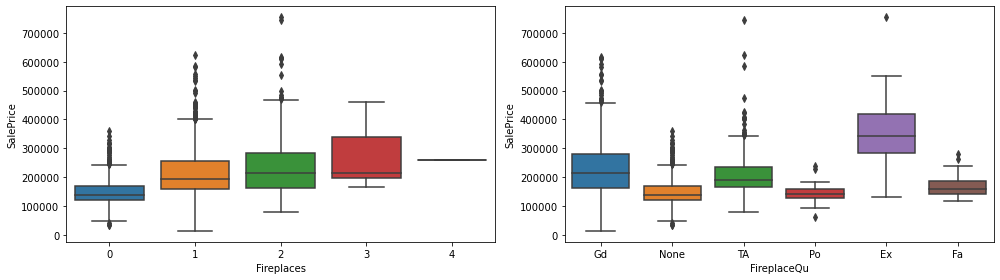

In [45]:
plt.figure(figsize=(14,4))
for i in range(0, len(fireplace)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data = df_update, x=fireplace[i], y = 'SalePrice')
    plt.tight_layout()

Most of the house have no fireplace or only one fireplace. Among the house with fireplace, both quantity and quality of of fireplace matters.

### Sale

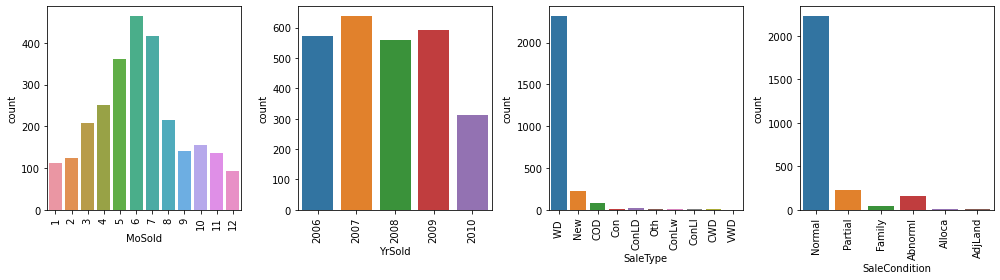

In [46]:
sale = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']

plt.figure(figsize=(14,4))
for i in range(0, len(sale)): 
    plt.subplot(1, 4, i+1)
    sns.countplot(data = df_update, x=sale[i])
    plt.xticks(rotation = 90)
    plt.tight_layout()

We have WD as majority of the SaleType and Normal in SaleCondition. These two columns can be considered to be dropped later. But for now I keep this value until we finish make the baseline model.

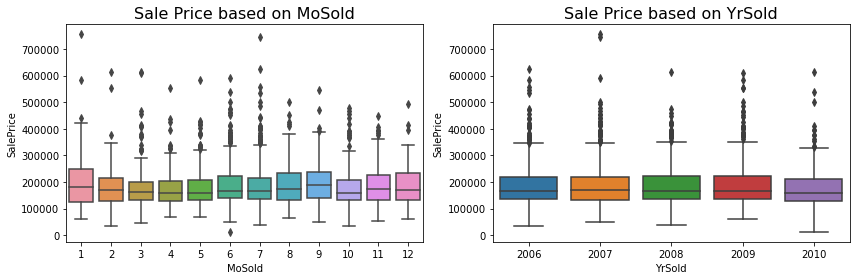

In [47]:
sale_check = ['MoSold', 'YrSold']
plt.figure(figsize=(12,4))
for i in range(len(sale_check)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x = sale_check[i], y = 'SalePrice', data = df_update)
    plt.title(f"Sale Price based on {sale_check[i]}", fontsize=16)
    plt.tight_layout()

For the sake of curiosity, I check the sale price based on the month and year it sold. Seems like there is no correlation whatsover. We can consider to drop it later.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

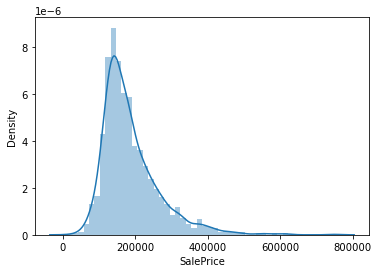

In [48]:
sns.distplot(df_update['SalePrice'])

Our target feature!
From the histogram above, we can confirm that SalePrice deviates from the normal distribution.It has positive skewness.

### Conclusion

1. As there are many houses that have no pool, fence, and misc feature, PoolQC, MiscFeature, Alley, Fence, FireplaceQu. Therefore, I changed 40% of missing value in PoolQC, MiscFeature, Alley, Fence, FireplaceQu columns to 'None' for now.
2. We can confirm that `OverallQual`, `TotalBsmtSF`, `1stFlrSF`,`GarageCars`, `GarageArea`, and `GrLvArea` seem to be linearly related with `SalePrice`. Both relationships are positive, which means that as one variable increases, the other also increases. However the relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
3. Beside the correlation with SalePrice, we can observe that there is high correlation of `GarageCars` and `GarageArea`. It makes sense because the bigger the garage area, the more cars can fit in. There also high correlation of `TotalBsmtSF` and `1stFlrSF`. We can drop one of them later.
4. From the scatterplot of `GrLvArea` and `SalePrice`, we find 2 outliers (because they have the best value and large area but are cheap). This is also strengthen by the fact that this outlier has high Overall Qual value but the price is cheap. I am convinced that the data is outliers we omit it.
5. There are many columns that has imbalance data distribution, such as `Street, Alley, LandContour, Utilities, LandSlope, Condition1, Condition2, RoofMatl, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, PavedDrive, PoolQC, MiscFeature`.
5. When we compare the price based on neighborhood, we can understand that in the areas that have a lot of housing, like NAmes and Gilbert, the house prices tend to be cheaper and the price range is very small. In addition, the highest prices are the houses located in the Floating Village Residential, with the street material Pavement and not located in an alley. The more expensive lot shapes are the irregular ones, with Hillside and Severe Slope Lot contours .The more expensive config is Frontage on 3 sides of house, which makes a lot of sense. Houses adjacent to or near to postive off-site features also considered to have higher price. In my opinion, this is because usually houses in hillside areas are usually the type of good quality houses such as villas and located near positive off-site. 
5. It's not just the number of houses that grows over time. The price of each house is also influenced by the year the house was built. We can also understand from this figure that most of house built around 2010 has higher Overall Value.
6.  The more bathrooms, the more higher the price. The other pattern that I notice is the better the kitchen, the higher the price. This means that quality matters more here. This also applies for basement.
7. There are also imbalance data in `SaleType` and `SaleCondition`. These two columns can be considered to be dropped later. But for now I keep this value until we finish make the baseline model. Additional note: It seems like there is no correlation between sale price based on the month and year it sold. We can consider to drop it later.